<a href="https://colab.research.google.com/github/farhanwadia/nlp_g14/blob/Geet/p3_TopicModeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setting up notebook


In [2]:
# cloning our Project Repo
!git clone -b Geet https://github.com/farhanwadia/nlp_g14.git

'git' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
%cd nlp_g14/

[WinError 2] The system cannot find the file specified: 'nlp_g14/'
c:\Users\patel\Jupyter_Notebooks\MIE1624_Notebooks\nlp_g14-Geet


In [4]:
! ls

'ls' is not recognized as an internal or external command,
operable program or batch file.


# Import Libraries


In [5]:
# importing basic python modules that we most probably will be using in the notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
try: 
  import langdetect
except:
  !pip install langdetect
  import langdetect

# to make sure our plots are inline with the code cells
%matplotlib inline 

# Train Model - Part 1's end carried forward

In [6]:
df = pd.read_csv('sentiment_analysis(eng_filtered).csv')
np.random.seed(0)
negative_idx = np.random.choice(df[df['label']==0].index, size = (5000))
positive_idx = np.random.choice(df[df['label']==1].index, size = (5000))
idx = np.concatenate((negative_idx, positive_idx))
ttr_data = df.filter(items = idx, axis = 0).reset_index(drop = True).drop(df.columns[0], axis = 1)
ttr_data

,text,label,language
0,The #Celtics season hasn't started off the way...,0,en
1,And the case for God from our yearning has a m...,0,en
2,what the fuck minseok's jxncnckcxx https://t.c...,0,en
3,#dubchallenge bc why not https://t.co/avn0SecD17,0,en
4,Teeter Hang Ups EP-560 Inversion Table ComforT...,0,en
...,...,...,...
9995,Good morning! Sunny but cool with highs in the...,1,en
9996,extremely thankful for my bffs. Thank you guys...,1,en
9997,Genuine happiness. I love this. https://t.co/x...,1,en
9998,RT @roywolt: please vote me as biggest zen fan...,1,en


In [7]:
# importing required NLTK modules for text processsing
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from bs4 import BeautifulSoup
import re

def PreProcessor(text):
  lemmatizer = WordNetLemmatizer()
  stopword = stopwords.words('english')
  # stopword.extend(['from', 'subject', 're', 'edu', 'use', 'russia', 'ukraine', 'war', 'russian']) ### Added some more stopwords
  text = BeautifulSoup(text, 'html.parser').get_text()
  text = re.sub(r'http\S+', '', text)
  text = re.sub(' +', ' ', text)
  tokens = nltk.word_tokenize(text)
  lower = [word.lower() for word in tokens]
  no_stopwords = [word for word in lower if word not in stopword]
  no_alpha = [word for word in no_stopwords if word.isalpha()]
  lemm_text = [lemmatizer.lemmatize(word) for word in no_alpha]
  normalized_text = lemm_text
  return normalized_text

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\patel\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\patel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\patel\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [8]:
# Pre process the data
ttr_data['pre-processed'] = ttr_data['text'].map(PreProcessor)
ttr_data['pre-processed text'] = ttr_data['pre-processed'].apply(lambda x: " ".join([str(word) for word in x]))

c:\Users\patel\Anaconda3\envs\MIE1624\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


In [9]:
# Split data into training and testing
from sklearn.model_selection import train_test_split

features = ttr_data.drop(columns = ['label'])
target = ttr_data['label']

# our splitting strategy would be 80%-20%, with splits stratified on target classes so that both splits will be balanced
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.20, stratify = target, random_state = 4)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = 0.50, stratify = y_test, random_state = 4)


In [10]:
X_train

,text,language,pre-processed,pre-processed text
4967,Tb to the day I felt like a freaking bomb ass ...,en,"[tb, day, felt, like, freaking, bomb, as, prin...",tb day felt like freaking bomb as princess thr...
8516,Enjoy the day #HappyVeteransday https://t.co/B...,en,"[enjoy, day, happyveteransday]",enjoy day happyveteransday
6486,I'm so proud of you. I love you @camilacabello...,en,"[proud, love, loveonlytee]",proud love loveonlytee
2344,Even water pumps in Arhab poor villagers relay...,en,"[even, water, pump, arhab, poor, villager, rel...",even water pump arhab poor villager relay beca...
5322,Happy birthday to my best friend and my person...,en,"[happy, birthday, best, friend, person, see, f...",happy birthday best friend person see friday
...,...,...,...,...
1907,When your #boss wants you to #suck another guy...,en,"[bos, want, suck, another, guy, ca, suck]",bos want suck another guy ca suck
4927,"@MartinSFP I'm sorry, Martin. https://t.co/cE7...",en,"[martinsfp, sorry, martin]",martinsfp sorry martin
4511,Ol' cranky has done well. https://t.co/yEasuO7yX8,en,"[ol, cranky, done, well]",ol cranky done well
9408,Happy birthday pretty girl ily!💗 https://t.co/...,en,"[happy, birthday, pretty, girl, ily]",happy birthday pretty girl ily


In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

def Vectorize(data, Vectorizer):
  X = Vectorizer.transform(data)
  words = Vectorizer.get_feature_names_out()
  X = pd.DataFrame(X.toarray())
  X.columns = words
  return X

In [12]:
# TF-IDF generation on pre-processed text

Vectorizer = TfidfVectorizer(analyzer = PreProcessor)
# Fitted_Vectorizer = Vectorizer.fit(X_train['text'])
# X_train = Vectorize(X_train['text'], Fitted_Vectorizer)

Fitted_Vectorizer = Vectorizer.fit(X_train['pre-processed text'])
X_train = Vectorize(X_train['pre-processed text'], Fitted_Vectorizer)


In [13]:
# Only keep English Words

from langdetect import detect
from langdetect.lang_detect_exception import LangDetectException

def detect_language(word):
  try:
    return detect(word)
  except LangDetectException:
    return None

english_words = [word for word in X_train.columns if detect_language(word) == 'en']
english_words

['abcnetwork',
 'abducted',
 'abort',
 'aborted',
 'abortion',
 'abpmarathon',
 'accessory',
 'accomplished',
 'account',
 'accused',
 'achieved',
 'acknowledges',
 'acreativedc',
 'acted',
 'acting',
 'actingdead',
 'action',
 'active',
 'actively',
 'activist',
 'activity',
 'actorleeminho',
 'actually',
 'adcoteschool',
 'addiction',
 'adoptdontshop',
 'adopted',
 'advanced',
 'advocating',
 'advocatingasd',
 'aestheticdolls',
 'affected',
 'affection',
 'affirmation',
 'african',
 'agency',
 'aired',
 'aitcofficial',
 'alcoholawareness',
 'aldubnowandthen',
 'aliciakeys',
 'allegorithmic',
 'alliflowers',
 'allingtoncrace',
 'allnewsongs',
 'allow',
 'allowed',
 'allowing',
 'allows',
 'allthingshallyu',
 'alpha',
 'alphabet',
 'already',
 'although',
 'altright',
 'altrightmeans',
 'alyssapacheco',
 'americafirst',
 'americanwrestle',
 'americaswhitetable',
 'amount',
 'amwriting',
 'analhentai',
 'analytics',
 'anchor',
 'andersoncooper',
 'andrew',
 'andrewcte',
 'andrewtwalk',


In [14]:
X_train = X_train[english_words]

In [15]:
# Train our Model - from the comprehensive Part 1 code we found the best model and that is used here

from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA

best_model = MLPClassifier(random_state = 4, max_iter = 1000, hidden_layer_sizes=[100, 50], activation='relu')
pca = PCA(n_components=1500)
pca.fit(X_train)
best_model.fit(X_train, y_train.values.ravel())

MLPClassifier(hidden_layer_sizes=[100, 50], max_iter=1000, random_state=4)

# Reddit Data

## Read and Clean Reddit Data - Part 2

In [16]:
reddit_data = 'russia_ukraine_reddit_comments.csv'
reddit_df = pd.read_csv(reddit_data)
reddit_df.head()

,Post - Author,Post - Date,Post - Is Distinguished,Post - Is Edited,Post - Is Original Content,Post - Is Locked,Post - Name,Post - num_comments,Post - over_18,Post - Permalink,...,Author,Date,Parent ID Prefix,Parent ID,Is Distinguished,Is Edited,Is Stickied,Permalink,Score,Body
0,flyingcatwithhorns,2023-03-15 14:16:41,NaN,False,False,False,t3_11rxpnv,392,False,http://www.reddit.com/r/MapPorn/comments/11rxp...,...,iwsfutcmd,2023-03-15 19:15:22,t3,11rxpnv,NaN,False,False,http://www.reddit.com/r/MapPorn/comments/11rxp...,75,Myanmar?\n\nwell that's a surprise
1,flyingcatwithhorns,2023-03-15 14:16:41,NaN,False,False,False,t3_11rxpnv,392,False,http://www.reddit.com/r/MapPorn/comments/11rxp...,...,snowday784,2023-03-15 17:25:13,t3,11rxpnv,NaN,False,False,http://www.reddit.com/r/MapPorn/comments/11rxp...,316,Bolivia what is you doing bby
2,flyingcatwithhorns,2023-03-15 14:16:41,NaN,False,False,False,t3_11rxpnv,392,False,http://www.reddit.com/r/MapPorn/comments/11rxp...,...,micahsaurus,2023-03-15 15:32:45,t3,11rxpnv,NaN,False,False,http://www.reddit.com/r/MapPorn/comments/11rxp...,202,"Kind of misleading.\n\nIt should read, “Which ..."
3,flyingcatwithhorns,2023-03-15 14:16:41,NaN,False,False,False,t3_11rxpnv,392,False,http://www.reddit.com/r/MapPorn/comments/11rxp...,...,grisioco,2023-03-15 14:28:30,t3,11rxpnv,NaN,False,False,http://www.reddit.com/r/MapPorn/comments/11rxp...,371,you know youre in the right when the only coun...
4,flyingcatwithhorns,2023-03-15 14:16:41,NaN,False,False,False,t3_11rxpnv,392,False,http://www.reddit.com/r/MapPorn/comments/11rxp...,...,Foreign_Phone59,2023-03-15 22:18:48,t3,11rxpnv,NaN,False,False,http://www.reddit.com/r/MapPorn/comments/11rxp...,50,Not Afganistan and Myanmar being beacons of re...


In [17]:
reddit_df['Date'].value_counts()

2022-03-03 09:57:35    2
2022-03-01 17:12:20    2
2023-02-20 19:49:39    2
2022-02-24 04:43:07    2
2022-03-01 17:45:34    2
                      ..
2023-02-24 15:57:55    1
2023-02-24 20:08:23    1
2023-02-24 18:33:48    1
2023-02-24 17:59:51    1
2023-02-21 17:36:10    1
Name: Date, Length: 7806, dtype: int64

In [18]:
red_text_df = reddit_df[['Body', 'Date']].copy(deep=True)

In [19]:
# Check nulls
red_text_df.isnull().sum(axis=0)

Body    0
Date    0
dtype: int64

In [20]:
# Drop Duplicates
print(red_text_df.info())
red_text_df.drop_duplicates(subset='Body', inplace=True)
red_text_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7852 entries, 0 to 7851
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Body    7852 non-null   object
 1   Date    7852 non-null   object
dtypes: object(2)
memory usage: 122.8+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7645 entries, 0 to 7851
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Body    7645 non-null   object
 1   Date    7645 non-null   object
dtypes: object(2)
memory usage: 179.2+ KB


In [21]:
# Filter to only have english

from langdetect import detect, DetectorFactory
DetectorFactory.seed = 0

def detect_language(text):
  try:
    return detect(text)
  except:
    return None

red_text_df['language'] = red_text_df['Body'].apply(detect_language)
red_text_df.head()

,Body,Date,language
0,Myanmar?\n\nwell that's a surprise,2023-03-15 19:15:22,en
1,Bolivia what is you doing bby,2023-03-15 17:25:13,en
2,"Kind of misleading.\n\nIt should read, “Which ...",2023-03-15 15:32:45,en
3,you know youre in the right when the only coun...,2023-03-15 14:28:30,en
4,Not Afganistan and Myanmar being beacons of re...,2023-03-15 22:18:48,en


In [22]:
# red_text_df['language'].value_counts()

In [23]:
# df_check = red_text_df[red_text_df['language'] != 'en']
# df_check.head(40)

In [24]:
red_text_df = red_text_df[red_text_df['language'] == 'en']
red_text_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7231 entries, 0 to 7851
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Body      7231 non-null   object
 1   Date      7231 non-null   object
 2   language  7231 non-null   object
dtypes: object(3)
memory usage: 226.0+ KB


c:\Users\patel\Anaconda3\envs\MIE1624\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(
c:\Users\patel\Anaconda3\envs\MIE1624\lib\site-packages\bs4\__init__.py:404: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(


(-0.5, 399.5, 199.5, -0.5)

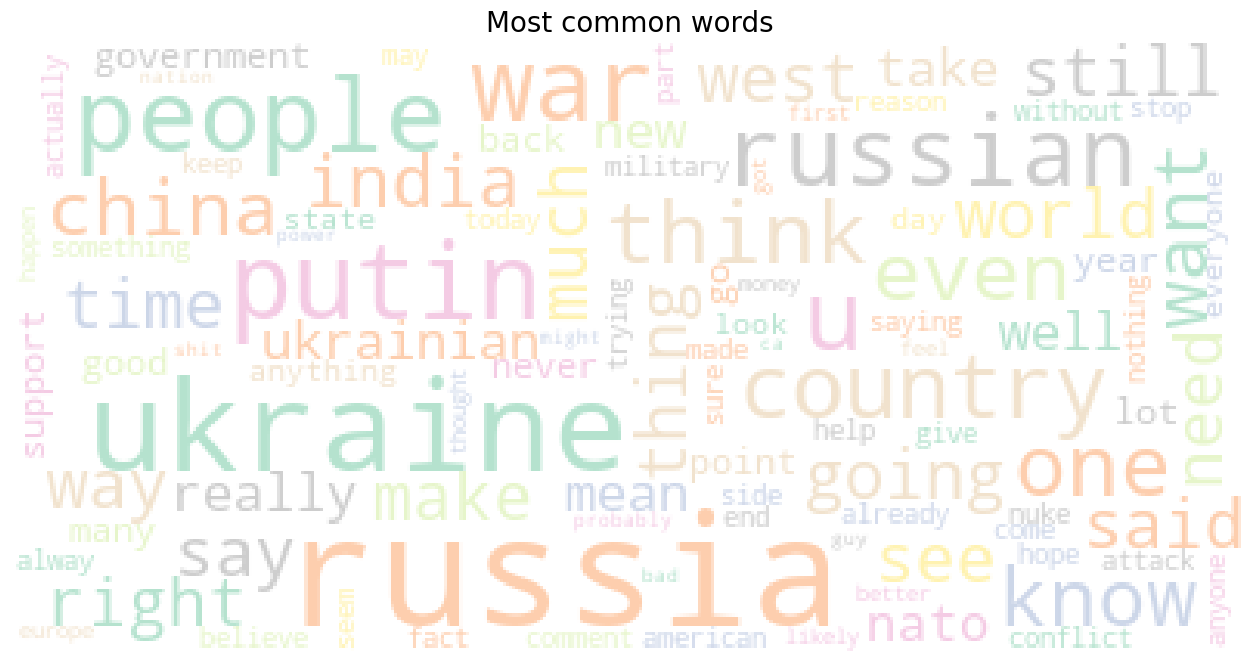

In [25]:
# let's checkput the word cloud of the tweets we have
try:
    from wordcloud import WordCloud
except:
    !pip install wordcloud
    from wordcloud import WordCloud
red_text_df['pre-processed'] = red_text_df['Body'].map(PreProcessor)
red_text_df['pre-processed text'] = red_text_df['pre-processed'].apply(lambda x: " ".join([str(word) for word in x]))
word_cloud = " ".join(red_text_df['pre-processed text'].values)

plt.figure(figsize=(16,13))
wc = WordCloud(background_color="white", max_words=100, max_font_size=50)
wc.generate(word_cloud)
plt.title("Most common words", fontsize=20)
plt.imshow(wc.recolor(colormap='Pastel2', random_state=4), alpha=0.98)
plt.axis('off')

## Reddit Data Prediction - Part 2

In [26]:
X_test = Vectorize(red_text_df['Body'], Fitted_Vectorizer)
X_test = X_test[english_words]
test_pred = best_model.predict(X_test)  

c:\Users\patel\Anaconda3\envs\MIE1624\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(
c:\Users\patel\Anaconda3\envs\MIE1624\lib\site-packages\bs4\__init__.py:404: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(


In [27]:
print(test_pred.shape)
test_pred

(7231,)


array([1, 1, 1, ..., 0, 0, 1], dtype=int64)

In [28]:
positive_idx = np.where(test_pred==1)[0].tolist()
negative_idx = np.where(test_pred==0)[0].tolist()

In [29]:
## USE THE MODEL TO GET POSITIVE TEXT & NEGATIVE TEXT
# split = int(red_text_df.shape[0]/2)
# positive = red_text_df.iloc[:split,:]
# negative = red_text_df.iloc[split:,:]

positive = red_text_df.iloc[positive_idx,:]
negative = red_text_df.iloc[negative_idx,:]


In [30]:
positive.head()

,Body,Date,language,pre-processed,pre-processed text
0,Myanmar?\n\nwell that's a surprise,2023-03-15 19:15:22,en,"[myanmar, well, surprise]",myanmar well surprise
1,Bolivia what is you doing bby,2023-03-15 17:25:13,en,"[bolivia, bby]",bolivia bby
2,"Kind of misleading.\n\nIt should read, “Which ...",2023-03-15 15:32:45,en,"[kind, misleading, read, country, voted, russi...",kind misleading read country voted russian inv...
3,you know youre in the right when the only coun...,2023-03-15 14:28:30,en,"[know, youre, right, country, supporting, nort...",know youre right country supporting north kore...
4,Not Afganistan and Myanmar being beacons of re...,2023-03-15 22:18:48,en,"[afganistan, myanmar, beacon, reason, asia]",afganistan myanmar beacon reason asia


## Reddit Data - Topic Modeling - Part 3

### Method 1: LDA - gensim library

LDA resource: https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0 


Tips to improve this model: https://www.analyticsvidhya.com/blog/2016/08/beginners-guide-to-topic-modeling-in-python/ 

Topic Modeling/Analysis Intro: 
1. https://monkeylearn.com/blog/introduction-to-topic-modeling/ 
2. https://monkeylearn.com/topic-analysis/ 

In [31]:
def token(text):
    token = nltk.word_tokenize(text)
    return token

# positive['Body Tokens'] = positive['Body'].map(token)
# positive_words = positive['Body Tokens'].tolist()
# negative['Body Tokens'] = negative['Body'].map(token)
# negative_words = negative['Body Tokens'].tolist()

positive_words = positive['pre-processed'].tolist()
negative_words = negative['pre-processed'].tolist()

In [32]:
try:
    import gensim.corpora as corpora
except:
    !pip install gensim
    import gensim.corpora as corpora
# Create Dictionary
id2word_p = corpora.Dictionary(positive_words)
# Create Corpus
texts_p = positive_words
# Term Document Frequency
corpus_p = [id2word_p.doc2bow(text) for text in texts_p]

# Create Dictionary
id2word_n = corpora.Dictionary(negative_words)
# Create Corpus
texts_n = negative_words
# Term Document Frequency
corpus_n = [id2word_n.doc2bow(text) for text in texts_n]

In [33]:
import gensim
from pprint import pprint
# number of topics
num_topics = 10
# Build LDA model
lda_model_p = gensim.models.LdaMulticore(corpus=corpus_p,
                                       id2word=id2word_p,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
print('REDDIT DATA: Topics from Positive comments:\n')
pprint(lda_model_p.print_topics())
doc_lda_p = lda_model_p[corpus_p]

REDDIT DATA: Topics from Positive comments:

[(0,
  '0.010*"russian" + 0.008*"think" + 0.008*"know" + 0.007*"like" + '
  '0.007*"ukraine" + 0.007*"india" + 0.006*"putin" + 0.005*"want" + '
  '0.005*"war" + 0.005*"u"'),
 (1,
  '0.016*"war" + 0.013*"russia" + 0.011*"ukraine" + 0.009*"country" + '
  '0.009*"china" + 0.008*"putin" + 0.008*"russian" + 0.007*"one" + '
  '0.007*"india" + 0.006*"like"'),
 (2,
  '0.011*"russia" + 0.008*"ukraine" + 0.008*"putin" + 0.008*"would" + '
  '0.007*"russian" + 0.007*"well" + 0.006*"know" + 0.006*"u" + 0.006*"time" + '
  '0.005*"china"'),
 (3,
  '0.019*"war" + 0.012*"russia" + 0.007*"world" + 0.007*"russian" + '
  '0.006*"want" + 0.006*"time" + 0.005*"mean" + 0.005*"people" + 0.005*"u" + '
  '0.005*"ukraine"'),
 (4,
  '0.030*"russia" + 0.007*"one" + 0.007*"china" + 0.007*"good" + '
  '0.007*"russian" + 0.007*"get" + 0.006*"even" + 0.006*"ukraine" + '
  '0.006*"putin" + 0.006*"war"'),
 (5,
  '0.011*"russia" + 0.010*"like" + 0.009*"u" + 0.008*"would" + 0.0

In [35]:
lda_model_n = gensim.models.LdaMulticore(corpus=corpus_n,
                                       id2word=id2word_n,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
print('REDDIT DATA: Topics from Negative comments:\n')
pprint(lda_model_n.print_topics())
doc_lda_n = lda_model_n[corpus_n]

REDDIT DATA: Topics from Negative comments:

[(0,
  '0.015*"russia" + 0.014*"ukraine" + 0.010*"people" + 0.009*"russian" + '
  '0.008*"war" + 0.008*"china" + 0.008*"want" + 0.006*"one" + 0.006*"country" '
  '+ 0.006*"would"'),
 (1,
  '0.017*"people" + 0.009*"russia" + 0.009*"like" + 0.008*"russian" + '
  '0.007*"putin" + 0.007*"war" + 0.006*"would" + 0.005*"ukraine" + '
  '0.005*"know" + 0.005*"one"'),
 (2,
  '0.027*"russia" + 0.013*"ukraine" + 0.010*"russian" + 0.008*"putin" + '
  '0.008*"country" + 0.007*"like" + 0.006*"would" + 0.006*"war" + 0.006*"u" + '
  '0.006*"people"'),
 (3,
  '0.020*"russia" + 0.011*"ukraine" + 0.010*"u" + 0.009*"would" + 0.009*"one" '
  '+ 0.008*"russian" + 0.007*"country" + 0.006*"think" + 0.006*"people" + '
  '0.006*"putin"'),
 (4,
  '0.018*"ukraine" + 0.018*"russia" + 0.009*"war" + 0.008*"would" + 0.007*"u" '
  '+ 0.006*"like" + 0.006*"world" + 0.005*"russian" + 0.005*"putin" + '
  '0.005*"country"'),
 (5,
  '0.015*"russia" + 0.012*"ukraine" + 0.011*"woul

### Method 2: LDA - sklearn library

LDA #2 Resource: https://www.analyticsvidhya.com/blog/2021/07/topic-modelling-with-lda-a-hands-on-introduction/

In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer
stopword = stopwords.words('english')
# stopword.extend(['from', 'subject', 're', 'edu', 'use', 'russia', 'ukraine', 'war', 'russian']) ### Added some more stopwords

vect2 =TfidfVectorizer(stop_words=stopword,max_features=1000)
vect_text_p2 =vect2.fit_transform(positive['pre-processed text'])
# vect_text_p =vect.fit_transform(positive['Body'])

In [61]:
from sklearn.decomposition import LatentDirichletAllocation
lda_model_p2=LatentDirichletAllocation(n_components=10, learning_method='online',random_state=42,max_iter=1) 
lda_top_p2=lda_model_p2.fit_transform(vect_text_p)

In [62]:
vocab = vect2.get_feature_names_out()
print('REDDIT DATA: Topics from Positive Comments - Method 2')
for i, comp in enumerate(lda_model_p2.components_):
     vocab_comp = zip(vocab, comp)
     sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:10]
     print("Topic "+str(i)+": ")
     for t in sorted_words:
            print(t[0],end=" ")
     print('\n')


REDDIT DATA: Topics from Positive Comments - Method 2
Topic 0: 
putin fuck oh yes point imagine sorry see wrong anyway 

Topic 1: 
everyone thanks agree never quite started come reason putin dude 

Topic 2: 
got talking source lol must vietnamese insane called arm anyone 

Topic 3: 
comment true crazy might work chicken definitely strategy useful nicaragua 

Topic 4: 
mean know think biden desantis news south forgot human abstained 

Topic 5: 
pretty special weird stupid fucked almost operation correct question simple 

Topic 6: 
north korea joke check read lmao edit poll nazi top 

Topic 7: 
shit made piece strong term deal real thank break law 

Topic 8: 
one well great war good guy get call russian world 

Topic 9: 
russia putin like russian ukraine china war would india time 



In [40]:
vect_n =TfidfVectorizer(stop_words=stopword,max_features=1000)
vect_text_n =vect_n.fit_transform(negative['pre-processed text'])

In [41]:
lda_model_n=LatentDirichletAllocation(n_components=10, learning_method='online',random_state=42,max_iter=1) 
lda_top_n=lda_model_n.fit_transform(vect_text_n)

In [42]:
vocab = vect_n.get_feature_names_out()
print('REDDIT DATA: Topics from Negative Comments - Method 2')
for i, comp in enumerate(lda_model_n.components_):
     vocab_comp = zip(vocab, comp)
     sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:10]
     print("Topic "+str(i)+": ")
     for t in sorted_words:
            print(t[0],end=" ")
     print('\n')

REDDIT DATA: Topics from Negative Comments - Method 2
Topic 0: 
rich money exactly desantis well known matter came calm others 

Topic 1: 
russia people ukraine war russian putin would like country think 

Topic 2: 
sound damn choice idiot mine fascist yesterday like material party 

Topic 3: 
really oh russia russian one though would country war oil 

Topic 4: 
front video fucking allowed hey mariupol line window job afghanistan 

Topic 5: 
right yeah anxious check note would nothing freedom trust free 

Topic 6: 
lie fox knew bunch news january politics orthodox christmas day 

Topic 7: 
florida throw worked thing yes two generally iran great well 

Topic 8: 
taiwan gop thought country china voted something head true need 

Topic 9: 
lithuania root wrong cia government common dont evil people conspiracy 



# Twitter Data

## Read and Clean Twitter Data - Part 2

In [44]:
twitter_data = 'Raw_Tweet_Data.csv'
twitter_df = pd.read_csv(twitter_data)
twitter_df.head()

C:\Users\patel\AppData\Local\Temp\ipykernel_45888\4279216409.py:2: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  twitter_df = pd.read_csv(twitter_data)


,url,date,rawContent,renderedContent,id,user,replyCount,retweetCount,likeCount,quoteCount,...,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags,card,viewCount,vibe,0
0,https://twitter.com/NatasaJevtovic/status/1498...,2022-02-27 23:59:43+00:00,Ex-Nato head says #Putin wanted to join allian...,Ex-Nato head says #Putin wanted to join allian...,1498085470374445056,"{'username': 'NatasaJevtovic', 'id': 489482046...",0,0,0,0,...,NaN,"[{'username': 'irismarketiq', 'id': 1471155981...",NaN,NaN,"['Putin', 'Nato', 'RussiaUkraine', 'RussiaUkra...",NaN,{'title': 'Ex-Nato head says Putin wanted to j...,NaN,NaN,NatasaJevtovic
1,https://twitter.com/TheRoostergod/status/14980...,2022-02-27 23:59:38+00:00,I recommend reading about the first &amp; seco...,I recommend reading about the first &amp; seco...,1498085448392007686,"{'username': 'TheRoostergod', 'id': 4050704716...",0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TheRoostergod
2,https://twitter.com/34istanbul571/status/14980...,2022-02-27 23:59:34+00:00,Russia-Ukraine tensions: Latest updates from o...,Russia-Ukraine tensions: Latest updates from o...,1498085431770034176,"{'username': '34istanbul571', 'id': 1451340639...",0,0,0,0,...,NaN,"[{'username': 'YouTube', 'id': 10228272, 'disp...",NaN,NaN,NaN,NaN,{'title': 'Russia-Ukraine tensions: Latest upd...,NaN,NaN,34istanbul571
3,https://twitter.com/yesliaaaa/status/149808541...,2022-02-27 23:59:30+00:00,"Omg, im so sad for him. Happy birthday handsom...","Omg, im so sad for him. Happy birthday handsom...",1498085415055593479,"{'username': 'yesliaaaa', 'id': 494917055, 'di...",0,0,2,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yesliaaaa
4,https://twitter.com/Pagetamil/status/149808540...,2022-02-27 23:59:27+00:00,Russia-Ukraine crisis: 5ஆம் நாள்: சர்வதேச நீதி...,Russia-Ukraine crisis: 5ஆம் நாள்: சர்வதேச நீதி...,1498085402594484228,"{'username': 'Pagetamil', 'id': 2503036010, 'd...",0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pagetamil


In [45]:
twi_text_df = twitter_df[['renderedContent']].copy(deep=True)

In [46]:
twi_text_df.rename(columns={'renderedContent':'Body'}, inplace=True)

In [47]:
twi_text_df.head()

,Body
0,Ex-Nato head says #Putin wanted to join allian...
1,I recommend reading about the first &amp; seco...
2,Russia-Ukraine tensions: Latest updates from o...
3,"Omg, im so sad for him. Happy birthday handsom..."
4,Russia-Ukraine crisis: 5ஆம் நாள்: சர்வதேச நீதி...


In [48]:
twi_text_df.isnull().sum(axis=0)

Body    0
dtype: int64

In [49]:
# Drop Duplicates
print(twi_text_df.info())
twi_text_df.drop_duplicates(subset='Body', inplace=True)
twi_text_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40008 entries, 0 to 40007
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Body    40008 non-null  object
dtypes: object(1)
memory usage: 312.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 38180 entries, 0 to 40007
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Body    38180 non-null  object
dtypes: object(1)
memory usage: 596.6+ KB


In [50]:
# from langdetect import detect, DetectorFactory
# DetectorFactory.seed = 0

# def detect_language(text):
#   try:
#     return detect(text)
#   except:
#     return None

twi_text_df['language'] = twi_text_df['Body'].apply(detect_language)
twi_text_df.head()

,Body,language
0,Ex-Nato head says #Putin wanted to join allian...,en
1,I recommend reading about the first &amp; seco...,en
2,Russia-Ukraine tensions: Latest updates from o...,en
3,"Omg, im so sad for him. Happy birthday handsom...",en
4,Russia-Ukraine crisis: 5ஆம் நாள்: சர்வதேச நீதி...,ta


In [51]:
twi_text_df = twi_text_df[twi_text_df['language'] == 'en']
twi_text_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32772 entries, 0 to 40006
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Body      32772 non-null  object
 1   language  32772 non-null  object
dtypes: object(2)
memory usage: 768.1+ KB


In [52]:
twi_text_df['pre-processed'] = twi_text_df['Body'].map(PreProcessor)
twi_text_df['pre-processed text'] = twi_text_df['pre-processed'].apply(lambda x: " ".join([str(word) for word in x]))

c:\Users\patel\Anaconda3\envs\MIE1624\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


## Twitter Data Prediction - Part 2

In [53]:
X_test2 = Vectorize(twi_text_df['Body'], Fitted_Vectorizer)
X_test2 = X_test2[english_words]
test2_pred = best_model.predict(X_test2)  

c:\Users\patel\Anaconda3\envs\MIE1624\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


In [54]:
test2_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [55]:
positive_idx2 = np.where(test2_pred==1)[0].tolist()
negative_idx2 = np.where(test2_pred==0)[0].tolist()

In [56]:
positive2 = twi_text_df.iloc[positive_idx2,:]
negative2 = twi_text_df.iloc[negative_idx2,:]

positive_words2 = positive['pre-processed'].tolist()
negative_words2 = negative['pre-processed'].tolist()

## Twitter Data Topic Modeling - Part 3

### Method 1: LDA - gensim library

In [57]:
try:
    import gensim.corpora as corpora
except:
    !pip install gensim
    import gensim.corpora as corpora
# Create Dictionary
id2word_p2 = corpora.Dictionary(positive_words2)
# Create Corpus
texts_p2 = positive_words2
# Term Document Frequency
corpus_p2 = [id2word_p2.doc2bow(text) for text in texts_p2]

# Create Dictionary
id2word_n2 = corpora.Dictionary(negative_words2)
# Create Corpus
texts_n2 = negative_words2
# Term Document Frequency
corpus_n2 = [id2word_n2.doc2bow(text) for text in texts_n2]

In [58]:
import gensim
from pprint import pprint
# number of topics
num_topics = 10
# Build LDA model
lda_model_p2 = gensim.models.LdaMulticore(corpus=corpus_p2,
                                       id2word=id2word_p2,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
print('Twitter Data: Positive Comments - method 1')
pprint(lda_model_p2.print_topics())
doc_lda2 = lda_model_p2[corpus_p2]

Twitter Data: Positive Comments - method 1
[(0,
  '0.020*"russia" + 0.016*"putin" + 0.015*"war" + 0.014*"ukraine" + '
  '0.009*"like" + 0.009*"u" + 0.009*"russian" + 0.005*"yes" + 0.005*"going" + '
  '0.004*"good"'),
 (1,
  '0.012*"u" + 0.011*"russia" + 0.008*"would" + 0.007*"ukraine" + 0.006*"like" '
  '+ 0.006*"russian" + 0.006*"want" + 0.006*"ukrainian" + 0.005*"putin" + '
  '0.005*"think"'),
 (2,
  '0.011*"russia" + 0.010*"time" + 0.009*"india" + 0.009*"like" + 0.008*"know" '
  '+ 0.007*"well" + 0.007*"russian" + 0.006*"war" + 0.006*"one" + '
  '0.006*"ukraine"'),
 (3,
  '0.022*"russia" + 0.021*"ukraine" + 0.012*"putin" + 0.010*"russian" + '
  '0.009*"like" + 0.007*"war" + 0.006*"u" + 0.005*"nato" + 0.005*"think" + '
  '0.005*"said"'),
 (4,
  '0.009*"russia" + 0.009*"putin" + 0.008*"want" + 0.007*"russian" + 0.007*"u" '
  '+ 0.007*"good" + 0.007*"going" + 0.006*"know" + 0.006*"war" + '
  '0.006*"ukraine"'),
 (5,
  '0.010*"ukraine" + 0.006*"war" + 0.006*"one" + 0.006*"russian" + '
 

In [59]:
lda_model_n2 = gensim.models.LdaMulticore(corpus=corpus_n2,
                                       id2word=id2word_n2,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
print('Twitter Data: Negative Comments - method 1')
pprint(lda_model_n2.print_topics())
doc_lda2 = lda_model_n2[corpus_n2]

Twitter Data: Negative Comments - method 1
[(0,
  '0.026*"russia" + 0.015*"ukraine" + 0.010*"war" + 0.010*"u" + 0.009*"people" '
  '+ 0.008*"country" + 0.008*"russian" + 0.007*"china" + 0.007*"would" + '
  '0.006*"want"'),
 (1,
  '0.012*"country" + 0.009*"people" + 0.009*"russia" + 0.009*"like" + '
  '0.008*"one" + 0.008*"u" + 0.006*"think" + 0.006*"china" + 0.006*"thing" + '
  '0.006*"get"'),
 (2,
  '0.014*"russia" + 0.012*"india" + 0.009*"like" + 0.009*"people" + '
  '0.008*"putin" + 0.007*"ukraine" + 0.007*"would" + 0.007*"war" + '
  '0.007*"country" + 0.006*"russian"'),
 (3,
  '0.018*"ukraine" + 0.017*"russia" + 0.017*"russian" + 0.011*"people" + '
  '0.011*"war" + 0.009*"would" + 0.009*"putin" + 0.007*"one" + 0.007*"country" '
  '+ 0.006*"u"'),
 (4,
  '0.012*"ukraine" + 0.012*"russia" + 0.011*"war" + 0.009*"russian" + '
  '0.008*"u" + 0.006*"would" + 0.005*"people" + 0.005*"also" + 0.005*"get" + '
  '0.005*"even"'),
 (5,
  '0.025*"russia" + 0.012*"war" + 0.010*"putin" + 0.010*"ukr

### Method 2: LDA - sklearn library

In [63]:
from sklearn.feature_extraction.text import TfidfVectorizer
stopword = stopwords.words('english')
# stopword.extend(['from', 'subject', 're', 'edu', 'use', 'russia', 'ukraine', 'war', 'russian']) ### Added some more stopwords

vect2 =TfidfVectorizer(stop_words=stopword,max_features=1000)
vect_text_p2 =vect2.fit_transform(positive2['pre-processed text'])
# vect_text_p =vect.fit_transform(positive['Body'])

In [67]:
from sklearn.decomposition import LatentDirichletAllocation
lda_model_p2=LatentDirichletAllocation(n_components=10, learning_method='online',random_state=42,max_iter=1) 
lda_top_p2=lda_model_p2.fit_transform(vect_text_p2)

In [68]:
vocab2 = vect2.get_feature_names_out()
print('Twitter Data: Positive Comments - Method 2')
for i, comp in enumerate(lda_model_p2.components_):
     vocab_comp2 = zip(vocab2, comp)
     sorted_words2 = sorted(vocab_comp2, key= lambda x:x[1], reverse=True)[:10]
     print("Topic "+str(i)+": ")
     for t in sorted_words2:
            print(t[0],end=" ")
     print('\n')


Twitter Data: Positive Comments - Method 2
Topic 0: 
visit war ukraine unitedstates russia state say news arm potus 

Topic 1: 
list event war expert covid trump japan propaganda got blinken 

Topic 2: 
russiaukrainewar ukrainenews india ukraine russiaukraine russia glance ahead video ukrainerussianwar 

Topic 3: 
america speech war ukraine blame never russia need congress like 

Topic 4: 
britain kyiv ukrainewar ukraine russia together surprise anniversary russian war 

Topic 5: 
biden ukraine russia war zelenskyy china year putin president usa 

Topic 6: 
biden conflict joe started russia impact ukraine start policy november 

Topic 7: 
february ukraine russia russian arrives joebiden missile comment retreat ukrainian 

Topic 8: 
war ukraine russia update day live via key putin youtube 

Topic 9: 
kherson ukraine war news russia support world global belarus plan 



In [69]:
vectn2 =TfidfVectorizer(stop_words=stopword,max_features=1000)
vect_text_n2 =vectn2.fit_transform(negative2['pre-processed text'])

In [70]:
lda_model_n2=LatentDirichletAllocation(n_components=10, learning_method='online',random_state=42,max_iter=1) 
lda_top_n2=lda_model_n2.fit_transform(vect_text_n2)

In [71]:
vocab2 = vectn2.get_feature_names_out()
print('Twitter Data: Negative Comments - Method 2')
for i, comp in enumerate(lda_model_n2.components_):
     vocab_comp2 = zip(vocab2, comp)
     sorted_words2 = sorted(vocab_comp2, key= lambda x:x[1], reverse=True)[:10]
     print("Topic "+str(i)+": ")
     for t in sorted_words2:
            print(t[0],end=" ")
     print('\n')

Twitter Data: Negative Comments - Method 2
Topic 0: 
top ukraine russia wounded war kiev economy twitter official rogozin 

Topic 1: 
potus visit war ukraine russia part history biden dispute much 

Topic 2: 
money earthquake ukraine russia family answer war america forced peace 

Topic 3: 
ukraine russia matter war must modern foreign country time government 

Topic 4: 
britain war ukraine russia proxy putin used al jazeera surprise 

Topic 5: 
biden trump sovereign china joe black house youtube global white 

Topic 6: 
unitedstates turkey missile defence germany crimea strike caused arm funding 

Topic 7: 
ukraine russia russian kherson ukrainian ukrainewar war kyiv force bakhmut 

Topic 8: 
live war washington putin update aid zelenskiy news ukrainenews billion 

Topic 9: 
please ukraine russia death actually bad got donetsk covid care 



## (Alternative method) LSA for Topic Modeling: - Part 3

Source: https://www.analyticsvidhya.com/blog/2018/10/stepwise-guide-topic-modeling-latent-semantic-analysis/ 

In [72]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer3 = TfidfVectorizer(stop_words='english', max_features= 1000, max_df = 0.5, smooth_idf=True)
Out_p = vectorizer3.fit_transform(positive2['pre-processed text'])
vectorizer4 = TfidfVectorizer(stop_words='english', max_features= 1000, max_df = 0.5, smooth_idf=True)
Out_n = vectorizer4.fit_transform(negative2['pre-processed text'])

In [76]:
from sklearn.decomposition import TruncatedSVD

# SVD represent documents and terms in vectors 
svd_model_p = TruncatedSVD(n_components=10, algorithm='randomized', n_iter=100, random_state=122)
svd_model_p.fit(Out_p)

svd_model_n = TruncatedSVD(n_components=10, algorithm='randomized', n_iter=100, random_state=122)
svd_model_n.fit(Out_n)


TruncatedSVD(n_components=10, n_iter=100, random_state=122)

In [77]:
terms = vectorizer3.get_feature_names_out()
print('Twitter Data Method 3: LSA - Positive Comments')
for i, comp in enumerate(svd_model_p.components_):
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:7]
    print("Topic "+str(i)+": ")
    for t in sorted_terms:
        print(t[0],end=" ")
    print('\n')
        # print(" ")

Twitter Data Method 3: LSA - Positive Comments
Topic 0: 
war news putin live update day russian 

Topic 1: 
war day list event key know invasion 

Topic 2: 
kherson russian ukrainewar ukrainian news unitedstates kyiv 

Topic 3: 
update live news kherson york new ukrainenews 

Topic 4: 
day know list invasion live update key 

Topic 5: 
putin news kherson list ukrainenews key event 

Topic 6: 
conflict news china kherson ukrainenews biden say 

Topic 7: 
russiaukraine news list russian event key russiaukrainewar 

Topic 8: 
list china biden event key ukrainewar kyiv 

Topic 9: 
china news biden know invasion russiaukraine world 



In [78]:
terms = vectorizer4.get_feature_names_out()
print('Twitter Data Method 3: LSA - Negative Comments')
for i, comp in enumerate(svd_model_n.components_):
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:7]
    print("Topic "+str(i)+": ")
    for t in sorted_terms:
        print(t[0],end=" ")
    print('\n')
        # print(" ")

Twitter Data Method 3: LSA - Negative Comments
Topic 0: 
war russian putin news ukrainian kherson live 

Topic 1: 
kherson russian ukrainian ukrainewar kyiv force unitedstates 

Topic 2: 
war news live kherson update ukrainenews latest 

Topic 3: 
putin live update nuclear news washington post 

Topic 4: 
biden china live update conflict kyiv washington 

Topic 5: 
kherson putin unitedstates kyiv ukrainewar war biden 

Topic 6: 
conflict kherson thing kyiv unitedstates nuclear update 

Topic 7: 
nato update live people kyiv ukrainewar country 

Topic 8: 
people know thing latest putin american kid 

Topic 9: 
nato thing know american today seek kid 

